In [23]:
import pandas as pd
df = pd.read_csv('rba-dataset-renamed-desktop.csv')
df = df.head(10000)

### View summary of dataset 

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                10000 non-null  int64  
 1   login_timestamp      10000 non-null  object 
 2   user_id              10000 non-null  object 
 3   round_trip           0 non-null      float64
 4   ip_address           10000 non-null  object 
 5   country              10000 non-null  object 
 6   region               9996 non-null   object 
 7   city                 9997 non-null   object 
 8   asn                  10000 non-null  int64  
 9   user_agent_string    10000 non-null  object 
 10  browser              10000 non-null  object 
 11  os_detail            10000 non-null  object 
 12  device_type          10000 non-null  object 
 13  is_login_success     10000 non-null  bool   
 14  is_attack_ip         10000 non-null  bool   
 15  is_account_takeover  10000 non-null  

In [25]:
# calculate the percentage of True and False values in bolean char'
value_counts_1 = df['is_login_success'].value_counts(normalize=True)
is_login_success_true = value_counts_1[True] * 100
is_login_success_false = value_counts_1[False] * 100
print("is_login_success")
print(f"Percentage of True values: {is_login_success_true:.2f}%")
print(f"Percentage of False values: {is_login_success_false:.2f}%")

value_counts_2 = df['is_attack_ip'].value_counts(normalize=True)
is_attack_ip_true  = value_counts_2[True] * 100
is_attack_ip_false = value_counts_2[False] * 100
print("is_attack_ip")
print(f"Percentage of True values: {is_attack_ip_true:.2f}%")
print(f"Percentage of False values: {is_attack_ip_false:.2f}%")

value_counts_3 = df['is_account_takeover'].value_counts(normalize=True)
is_account_takeover_true  = value_counts_3[True] * 100
is_account_takeover_false = value_counts_3[False] * 100
print("is_account_takeover")
print(f"Percentage of True values: {is_account_takeover_true:.2f}%")
print(f"Percentage of False values: {is_account_takeover_false:.2f}%")


is_login_success
Percentage of True values: 63.72%
Percentage of False values: 36.28%
is_attack_ip
Percentage of True values: 3.70%
Percentage of False values: 96.30%


#### findings
- dataset contains 9 character variables, 3 character numerical and 3 character boolean
- the target is `is_login_success` based on calculation percentage above

In [26]:
df.describe()

,index,round_trip,asn
count,10000.000000,0.0,10000.000000
mean,48199.627200,NaN,93487.358400
std,28538.554109,NaN,149766.528227
min,10.000000,NaN,224.000000
25%,23229.750000,NaN,29695.000000
50%,48266.500000,NaN,29695.000000
75%,72351.250000,NaN,45916.000000
max,99116.000000,NaN,507361.000000


In [27]:
# check for missing values
df.isnull().sum()

index                      0
login_timestamp            0
user_id                    0
round_trip             10000
ip_address                 0
country                    0
region                     4
city                       3
asn                        0
user_agent_string          0
browser                    0
os_detail                  0
device_type                0
is_login_success           0
is_attack_ip               0
is_account_takeover        0
dtype: int64

### drop un-used column

In [28]:
# drop columns index, is_attack_ip, is_account_takeover
df.drop(['round_trip', 'index', 'is_attack_ip', 'is_account_takeover', 'user_id', 'token', 'device_type'], axis=1, inplace=True)

In [29]:
df.isnull().sum()

login_timestamp      0
ip_address           0
country              0
region               4
city                 3
asn                  0
user_agent_string    0
browser              0
os_detail            0
is_login_success     0
dtype: int64

### List of features

In [30]:
def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))


initial_eda(df)
df.shape

Dimensions : 10000 rows, 10 columns
Total NA Values : 7 
                           Column Name  Data Type      #Distinct  NA Values
                       login_timestamp     object        10000          0
                            ip_address     object         6240          0
                               country     object           54          0
                                region     object          176          4
                                  city     object          807          3
                                   asn      int64          409          0
                     user_agent_string     object          378          0
                               browser     object          117          0
                             os_detail     object           51          0
                      is_login_success       bool            2          0


(10000, 10)

In [31]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)


There are 8 categorical variables

The categorical variables are :

 ['login_timestamp', 'ip_address', 'country', 'region', 'city', 'user_agent_string', 'browser', 'os_detail']


### Summary of categorical variables
- There are 9 categorical variables in the dataset.
-The categorical variables are given by `['login_timestamp', 'ip_address', 'country', 'region', 'city', 'user_agent_string', 'browser', 'os_detail', 'device_type']`
- `is_login_success` is target

In [32]:
# find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :\n\n', numerical)


There are 2 numerical variables

The numerical variables are :

 ['asn', 'is_login_success']


### Summary of numerical variables
- There are 6 numerical variables.
- All of the numerical variables are of discrete data type.


## Preprocessing

### Explore Categorical Value

In [33]:
import ipaddress

# Preprocess the data
def preprocess_data(df):
    df_encoded = encode_ip_addresses(df['ip_address'])
    df_encoded.columns = ['ip_' + str(col) for col in df_encoded.columns]
    df = pd.concat([df.drop(columns='ip_address'), df_encoded], axis=1)
    df = preprocess_user_agent(df, 'user_agent_string', 'device_type')
    df = preprocess_timestamp(df, 'login_timestamp')
    # Perform additional preprocessing steps if necessary
    return df

# Encode IP addresses using one-hot encoding
def encode_ip_addresses(ip_addresses):
    encoded_ips = []
    max_prefixlen = 0

    # Find the maximum prefix length among the IP addresses
    for ip in ip_addresses:
        ip_obj = ipaddress.ip_address(ip)
        max_prefixlen = max(max_prefixlen, ip_obj.max_prefixlen)

    # Perform one-hot encoding for each IP address
    for ip in ip_addresses:
        ip_obj = ipaddress.ip_address(ip)
        ip_binary = bin(int(ip_obj))[2:].zfill(max_prefixlen)
        encoded_ip = [int(bit) for bit in ip_binary]
        encoded_ips.append(encoded_ip)

    encoded_df = pd.DataFrame(encoded_ips)
    return encoded_df

# Preprocess the user agent column
def preprocess_user_agent(df, user_agent_column, device_type):
    df['device_type'] = df[device_type]
    df['operating_system'] = df[user_agent_column].apply(lambda x: x.split('(')[1].split(';')[1])
    df.drop(columns=[user_agent_column], inplace=True)
    return df

# Preprocess the browser column
def preprocess_browser(df, browser_column):
    df['browser'] = df[browser_column].split(' ')[0]
    df.drop(columns=[browser_column], inplace=True)
    return df

# Preprocess the login_timestamp column
def preprocess_timestamp(df, timestamp_column):
    df[timestamp_column] = pd.to_datetime(df[timestamp_column])
    df['hour'] = df[timestamp_column].dt.hour
    df['day_of_week'] = df[timestamp_column].dt.dayofweek
    df['month'] = df[timestamp_column].dt.month
    df.drop(columns=[timestamp_column], inplace=True)
    return df


## Split data into separate training and test set
- split data into training and test
- Declare feature vector and target variable ¶

In [34]:
from sklearn.model_selection import train_test_split

# X is the input variable
# Y is the output variable

X = df.drop(['is_login_success'], axis=1)
y = df['is_login_success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)


In [35]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((6000, 9), (4000, 9))

### Feature Engineering

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

In [36]:
X_train.dtypes

login_timestamp      object
ip_address           object
country              object
region               object
city                 object
asn                   int64
user_agent_string    object
browser              object
os_detail            object
dtype: object

In [37]:
X_train.head()

,login_timestamp,ip_address,country,region,city,asn,user_agent_string,browser,os_detail
9761,2020-02-04 16:24:22.568,51.175.181.99,NO,Oslo County,Oslo,29695,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_...,Chrome 90.0.4411,Mac OS X 10.14.6
3159,2020-02-03 18:45:02.737,81.166.6.161,NO,Innlandet,Elverum,29695,Mozilla/5.0 (X11; CrOS aarch64 11316.123.0) A...,Chrome 69.0.3497.17.28,Chrome OS 11316.123.0
1489,2020-02-03 15:21:46.897,10.0.4.23,RO,Bucuresti,Bucharest,500039,Mozilla/5.0 (Macintosh; Intel Mac OS X 11_6_3...,Chrome 72.0.3626.115,Mac OS X 11.6.3
2987,2020-02-03 18:20:10.348,2.148.17.151,NO,Møre og Romsdal,Ålesund,2119,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Chrome 86.0.4202,Mac OS X 10.14.6
812,2020-02-03 14:02:01.915,79.161.121.255,BR,-,-,29695,Mozilla/5.0 (X11; CrOS armv7l 5978.98.0) Appl...,Chrome 72.0.3626.82,Chrome OS 5978.98.0


In [38]:

import category_encoders as ce


# One-hot encode the categorical features
# encode categorical variables with ordinal encoding
# see def preprocess_data(df) above
encoder = ce.OneHotEncoder(cols= ['login_timestamp', 'ip_address', 'country', 'region', 'city', 'user_agent_string', 'browser', 'os_detail']
)
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)
X_train.head()



,login_timestamp_1,login_timestamp_2,login_timestamp_3,login_timestamp_4,login_timestamp_5,login_timestamp_6,login_timestamp_7,login_timestamp_8,login_timestamp_9,login_timestamp_10,...,os_detail_37,os_detail_38,os_detail_39,os_detail_40,os_detail_41,os_detail_42,os_detail_43,os_detail_44,os_detail_45,os_detail_46
9761,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3159,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1489,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2987,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
812,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
X_train.shape

(6000, 11549)

### Random Forest Classifier model with default parameters

In [40]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)


# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7225



Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

Here, I have build the Random Forest Classifier model with default parameter of n_estimators = 10. So, I have used 10 decision-trees to build the model. Now, I will increase the number of decision-trees and see its effect on accuracy.


### Random Forest Classifier model with 100 Decision Trees

In [41]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)


# fit the model to the training set
rfc_100.fit(X_train, y_train)

# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.7225


## Feature Importance

### Gini importance 


In [42]:
# create the classifier with n_estimators = default
clf = RandomForestClassifier(random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [43]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

asn                     0.024880
country_1               0.011343
country_3               0.006191
user_agent_string_3     0.004757
os_detail_3             0.004299
                          ...   
login_timestamp_5708    0.000000
login_timestamp_3143    0.000000
login_timestamp_4803    0.000000
login_timestamp_4407    0.000000
login_timestamp_2118    0.000000
Length: 11549, dtype: float64

ValueError: Length of Index vectors must match length of `data` when both are used, but `data` has length 10000 and the vector passed to `y` has length 11549.

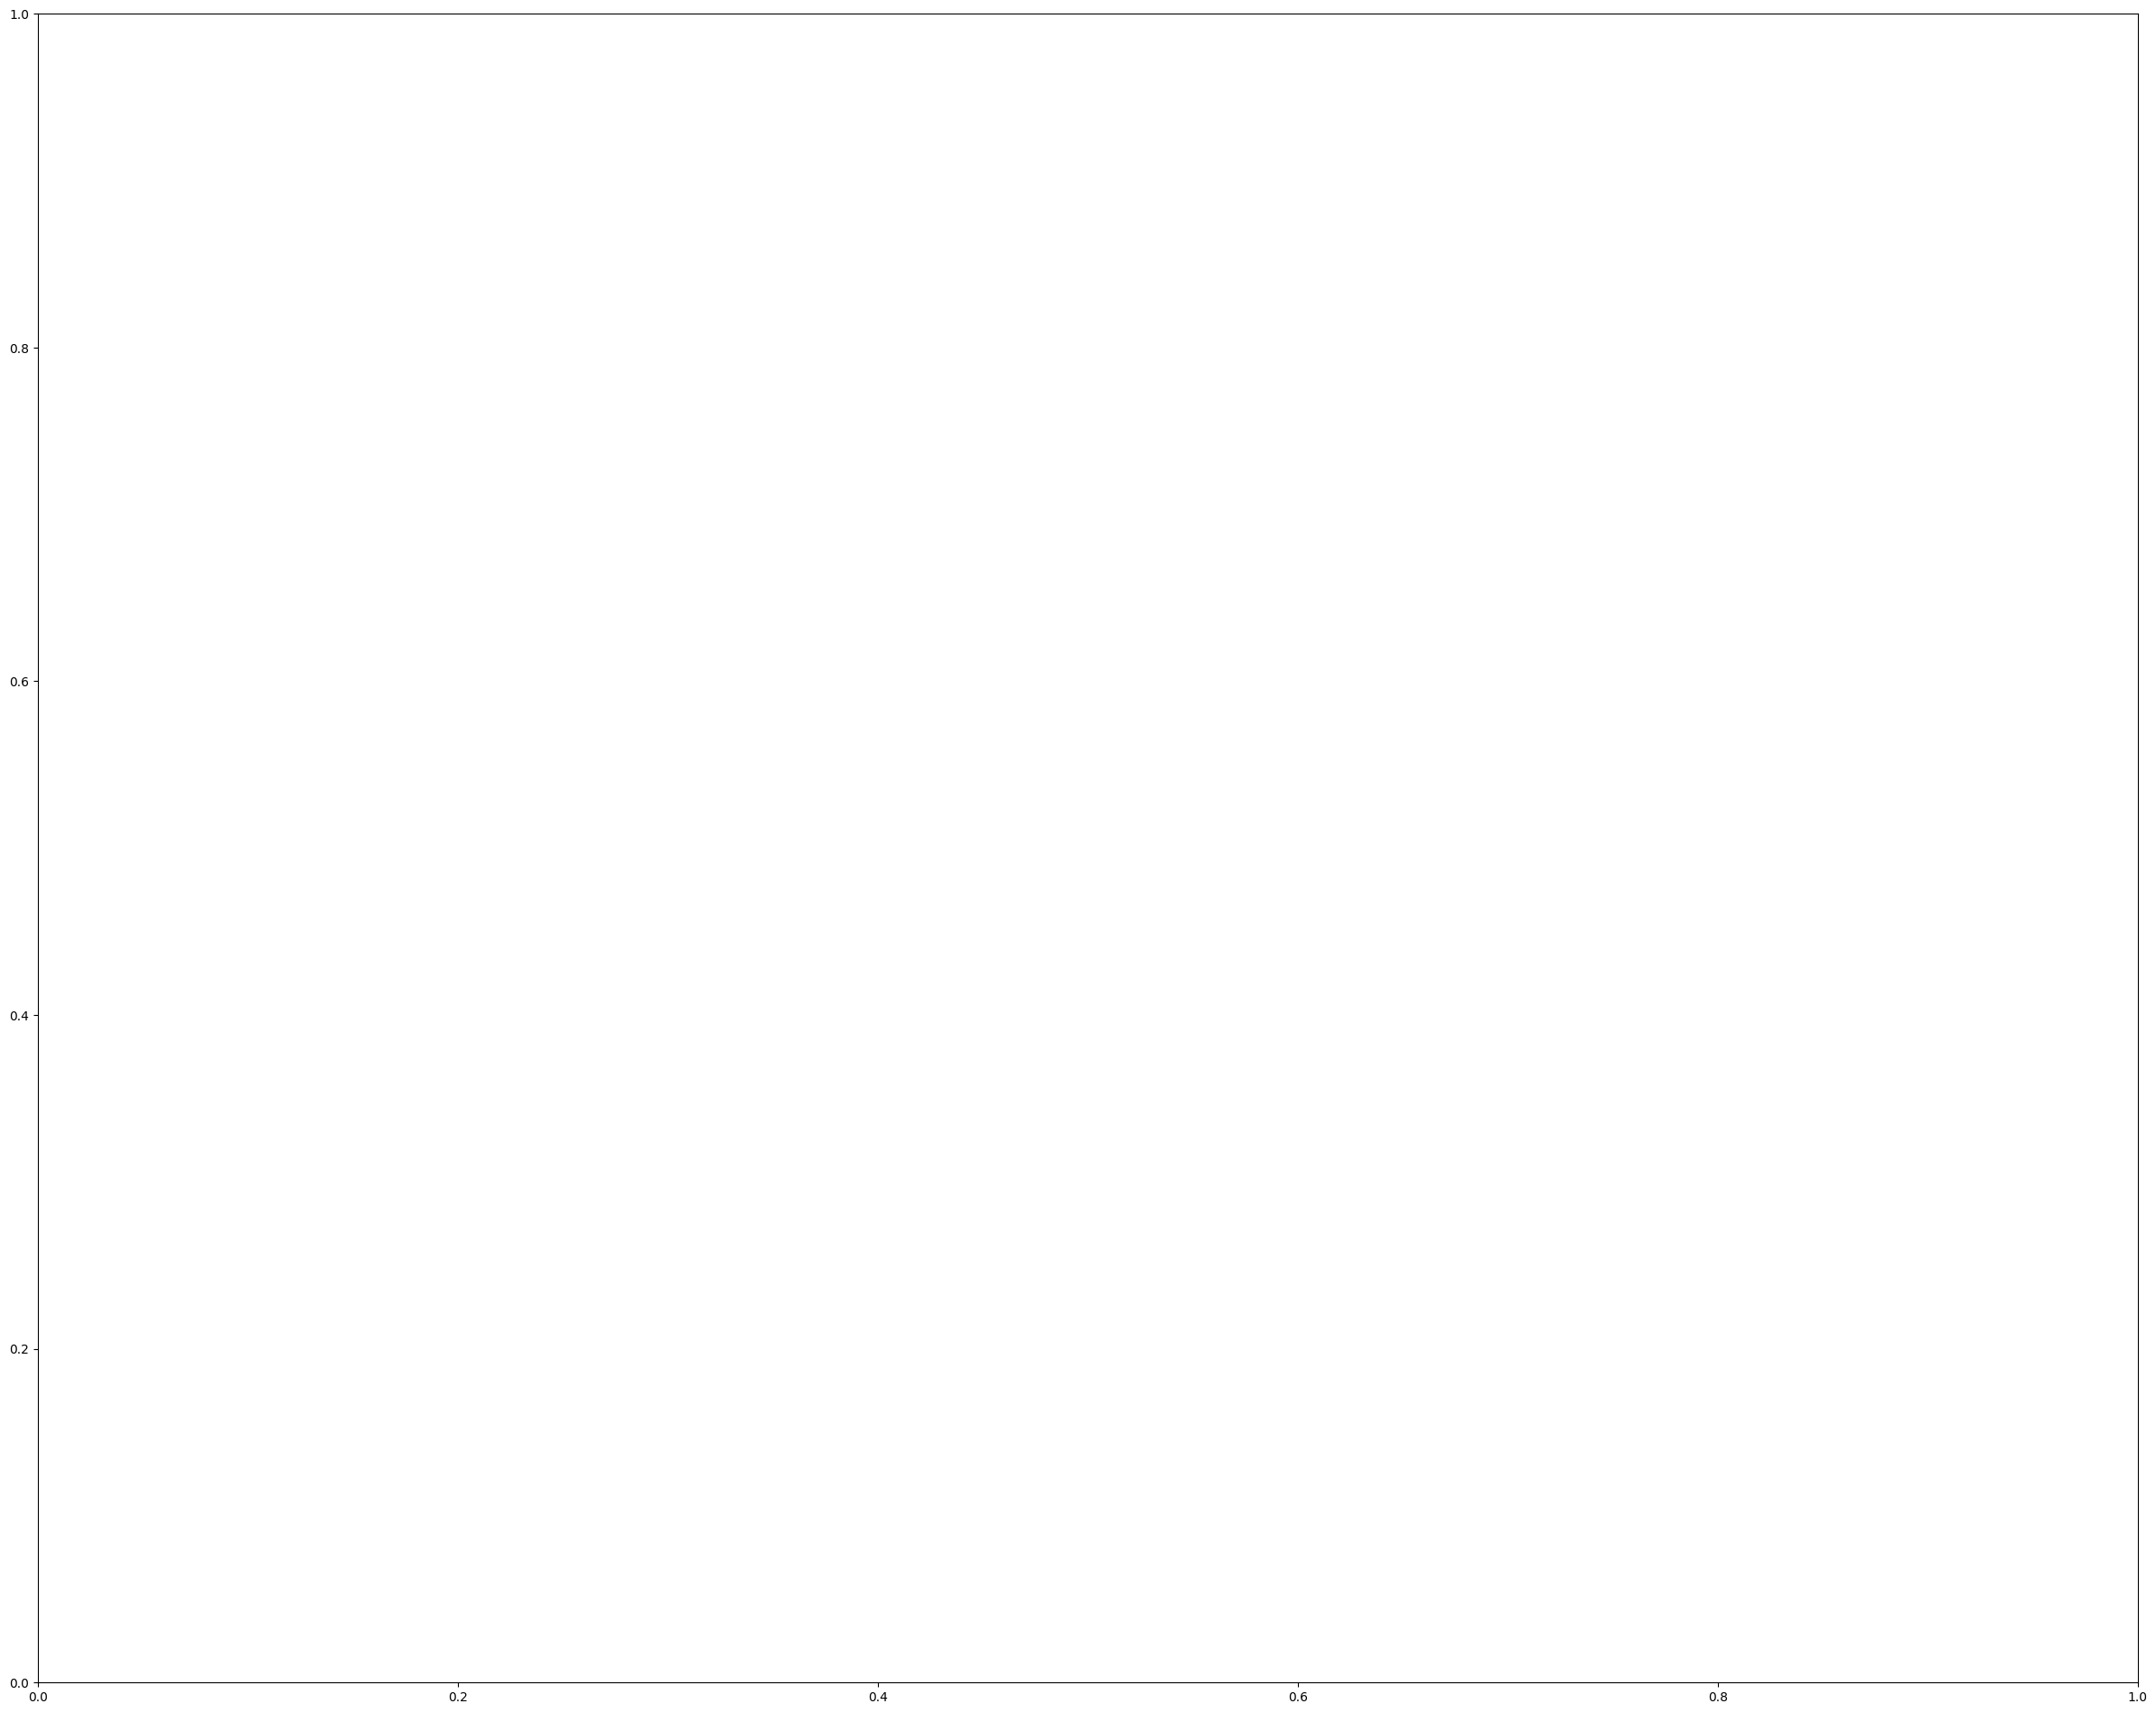

In [49]:
# Visualize feature scores of the features 
# Creating a seaborn bar plot
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=df)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

ValueError: Length of Index vectors must match length of `data` when both are used, but `data` has length 10000 and the vector passed to `y` has length 70.

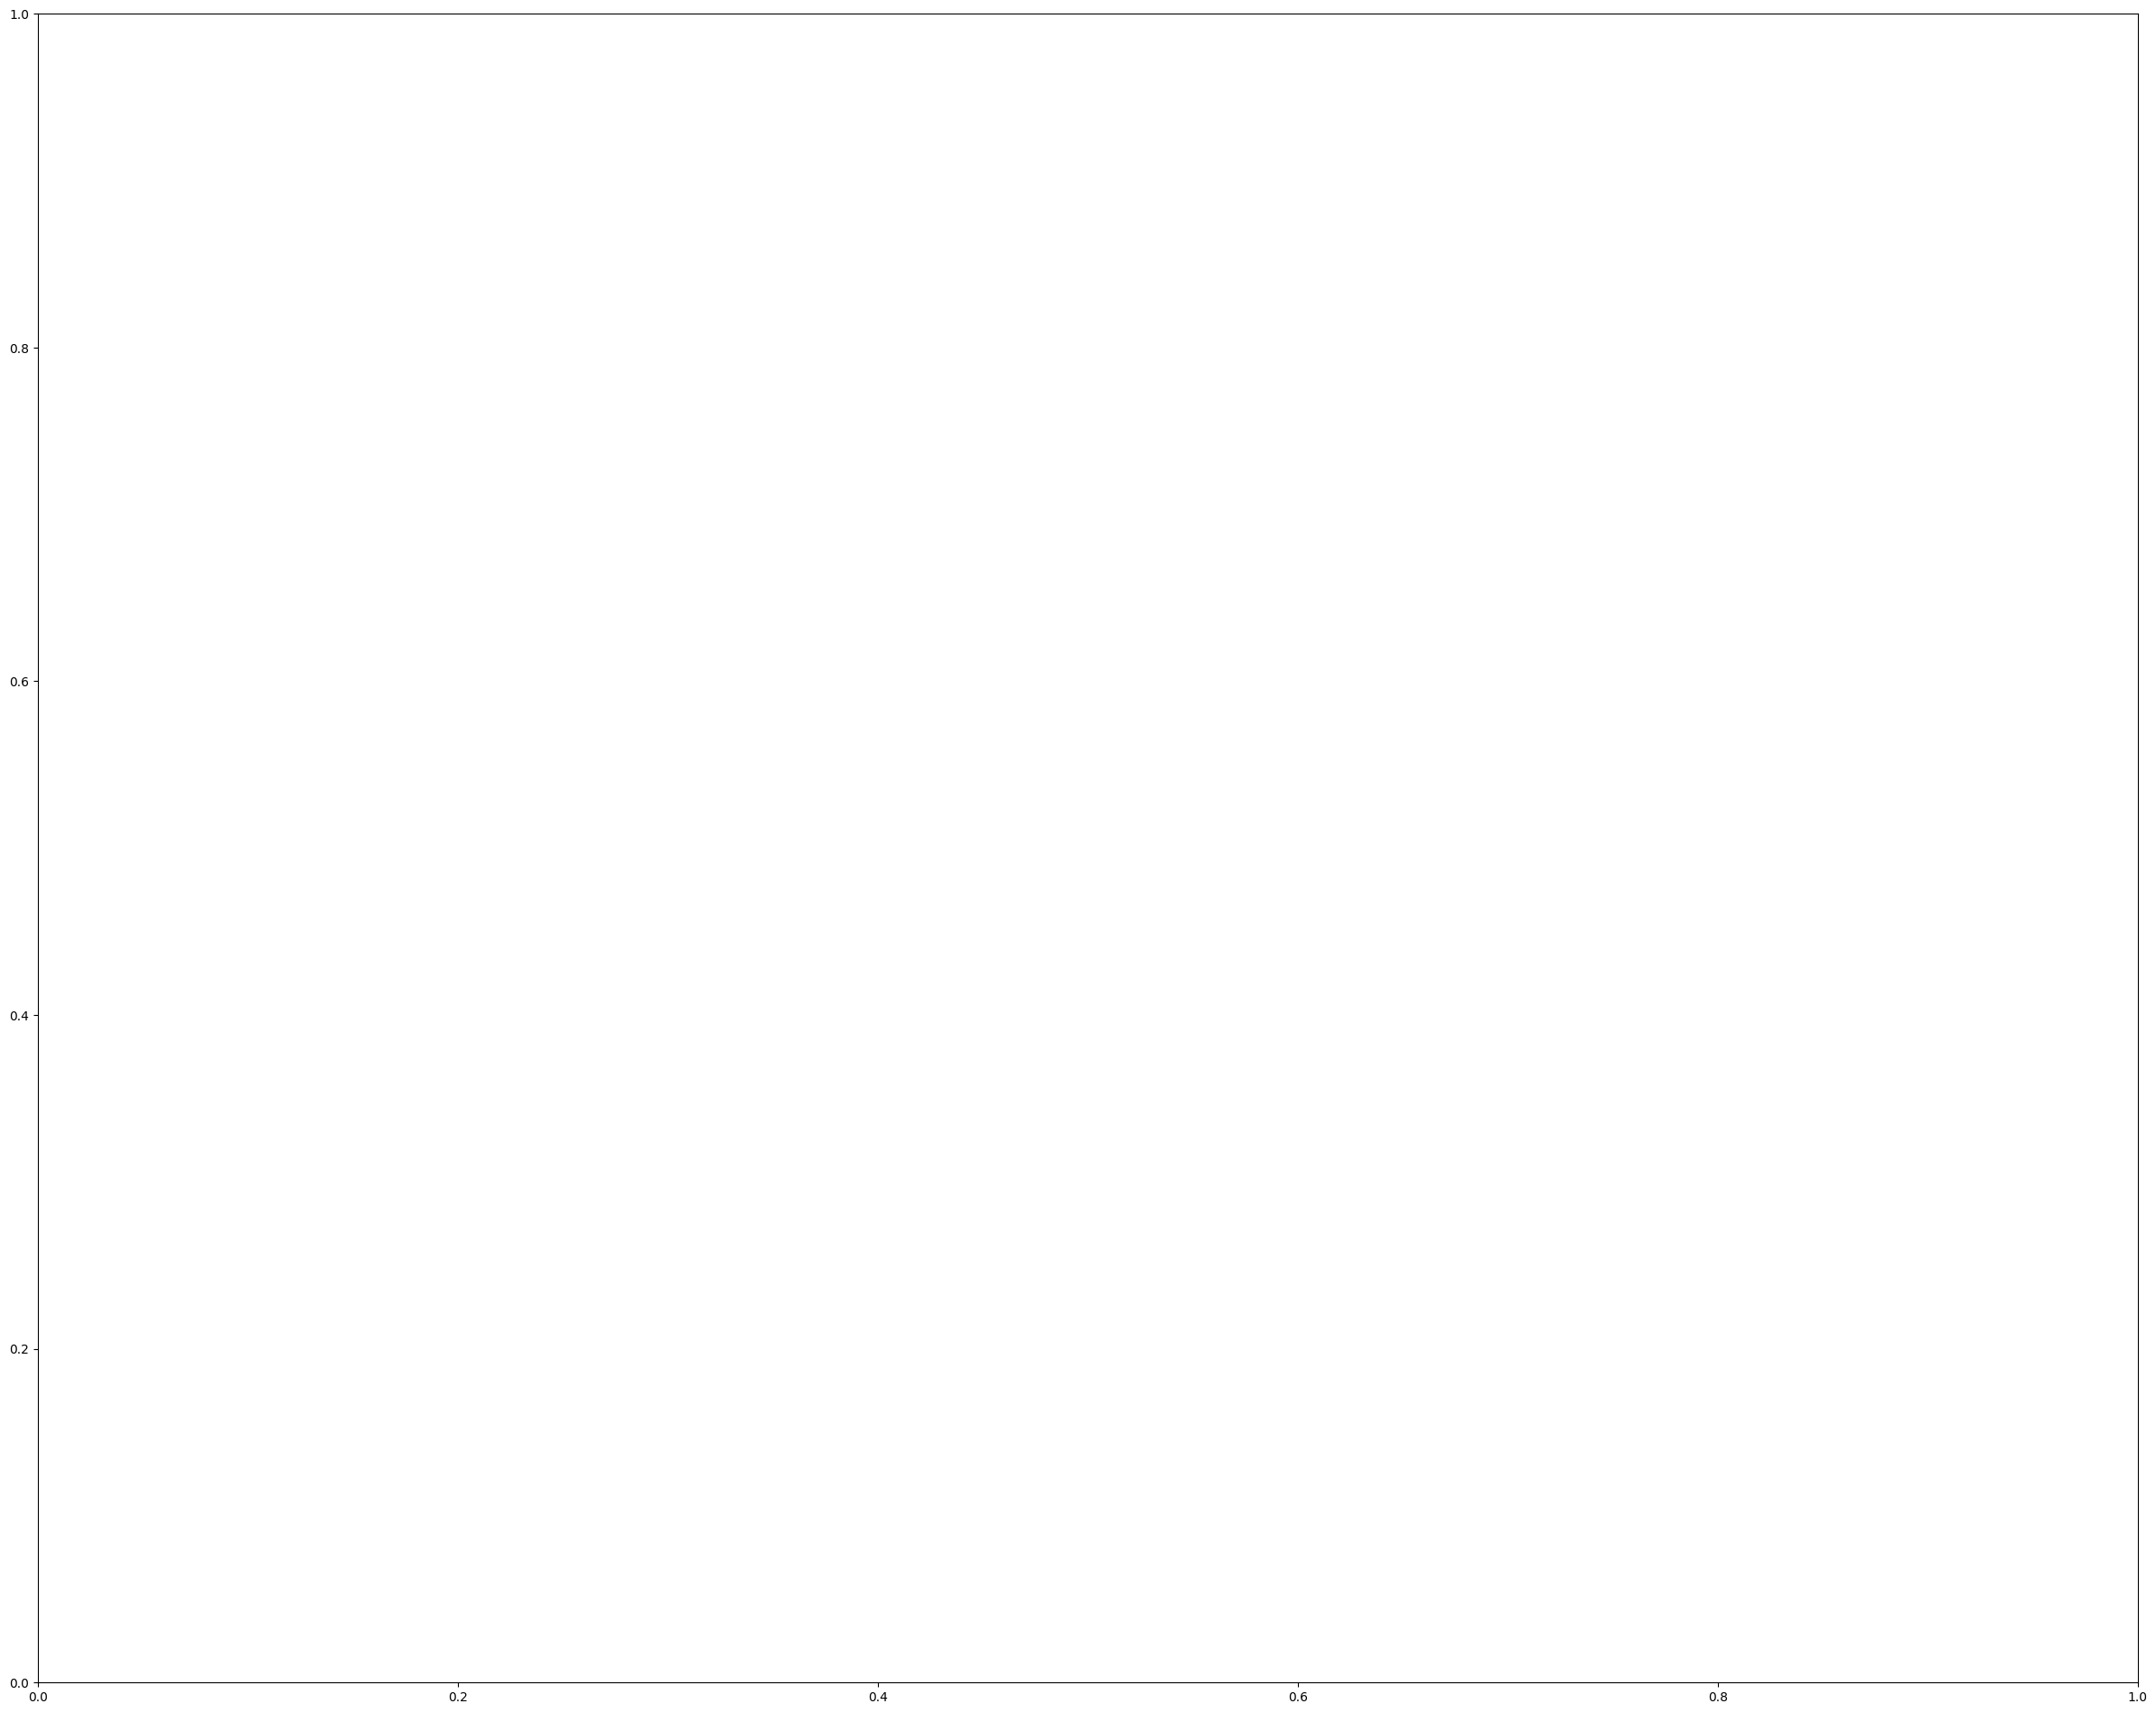

In [50]:
# Now i will drop feature_scores < 0.001
feature_scores_1 = feature_scores[feature_scores > 0.001]
feature_scores_1

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores_1, y=feature_scores_1.index, data=df)
ax.set_title("Visualize feature scores of the new features")
ax.set_yticklabels(feature_scores_1.index)
ax.set_xlabel("New Feature importance score")
ax.set_ylabel("New Features")
plt.show()

In [ ]:
# list column name that feature_scores[feature_scores > 0.001]
drop_column = feature_scores[feature_scores <= 0.001].index
X_train = X_train.drop(drop_column, axis=1)
X_test = X_test.drop(drop_column, axis=1)

In [ ]:
X_train.shape

In [ ]:
# Now, I will build the random forest model again and check accuracy.
clf = RandomForestClassifier(random_state=0)

# fit the model to the training set
rfc_base = clf.fit(X_train, y_train)

# Predict on the test set results
y_pred = clf.predict(X_test)

# Check accuracy score 
print('Model accuracy score with feature_scores < 0.01 variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

## Evaluation

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

### Confusion Matrix

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


### Classification Report

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


In [ ]:
y_train_pred=rfc_base.predict(X_train)
y_train_prob=rfc_base.predict_proba(X_train)[:,1]
y_test_prob=rfc_base.predict_proba(X_test)[:,1]
 
print('Train Accuracy',accuracy_score(y_train,y_test))
print('Train AUC',roc_auc_score(y_train,y_train_prob))
print()
print('Test Accuracy',accuracy_score(y_test,rfc_pred))
print('Test AUC',roc_auc_score(y_test,y_test_prob))

In [ ]:
import pickle
with open('rfc_model_pkl', 'wb') as files:
   pickle.dump(rfc_base, files)

In [ ]:
# load saved model
with open('rfc_model_pkl' , 'rb') as f:
   rfc_pretrained = pickle.load(f)

In [ ]:
feature_scores_1